# ECAT

In [1]:
import numpy as np
from matplotlib import cm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os
import nibabel as nib
nibabel_dir = os.path.dirname(nib.__file__)
from nibabel import ecat

# Import all of the ECAT files

In [48]:
#file = '/home/andreas/Desktop/scientific_computing_project/bilder/02_PE2I_klinik_hermes_rCBF.v'

data_path = '/home/andreas/Desktop/scientific_computing_project/scans/ecat_scans'

#Collect all dicom images
listFilesECAT = [] #create an empty list
def load_scan2(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if ".v" in filename.lower(): #check wheter the file's ECAT
                listFilesECAT.append(os.path.join(dirName, filename))
                
    return listFilesECAT

# List of the path to the files in the specified directory
patientList = load_scan2(data_path)
patientList.sort() #SUVr 1st, rCBF 2nd

# Get reference picture to get the proper sizes
refImg = ecat.load(patientList[0]).get_frame(0)

#Create an array to store the scans of all the patients
images = np.zeros((np.shape(refImg)[0],np.shape(refImg)[1],np.shape(refImg)[2], np.size(patientList)))
for nr in range(np.size(patientList)):
    images[:,:,:,nr] = ecat.load(patientList[nr]).get_frame(0)

In [47]:
patientList

128

11 /home/andreas/Desktop/scientific_computing_project/scans/ecat_scans/06_PE2I_klinik_hermes_SUVr-1.v
12 /home/andreas/Desktop/scientific_computing_project/scans/ecat_scans/06_PE2I_klinik_hermes_rCBF.v
33 /home/andreas/Desktop/scientific_computing_project/scans/ecat_scans/17_PE2I_klinik_hermes_SUVr-1.v
34 /home/andreas/Desktop/scientific_computing_project/scans/ecat_scans/17_PE2I_klinik_hermes_rCBF.v


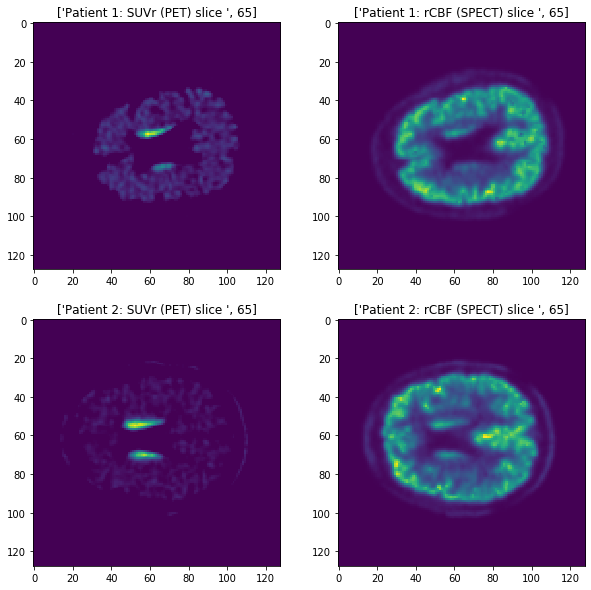

In [43]:
#Disable interactions
%matplotlib inline

patient1 = 6 #SICK
patient2 = 17 #HEALTHY
sliceNr = 65

fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].imshow(images[:,:,sliceNr, (patient1-1)*2]) #SUVr
axs[0, 0].set_title(['Patient 1: SUVr (PET) slice ', sliceNr])
axs[0, 1].imshow(images[:,:,sliceNr, (patient1-1)*2+1]) #rCBF
axs[0, 1].set_title(['Patient 1: rCBF (SPECT) slice ', sliceNr])
axs[1, 0].imshow(images[:,:,sliceNr, (patient2-1)*2]) #SUVr
axs[1, 0].set_title(['Patient 2: SUVr (PET) slice ', sliceNr])
axs[1, 1].imshow(images[:,:,sliceNr, (patient2-1)*2+1]) #rCBF
axs[1, 1].set_title(['Patient 2: rCBF (SPECT) slice ', sliceNr])

print((patient1-1)*2+1, patientList[(patient1-1)*2])
print((patient1-1)*2+2, patientList[(patient1-1)*2+1])
print((patient2-1)*2+1, patientList[(patient2-1)*2])
print((patient2-1)*2+2, patientList[(patient2-1)*2+1])

# Scoll up and down in slices of the brain

<IPython.core.display.Javascript object>


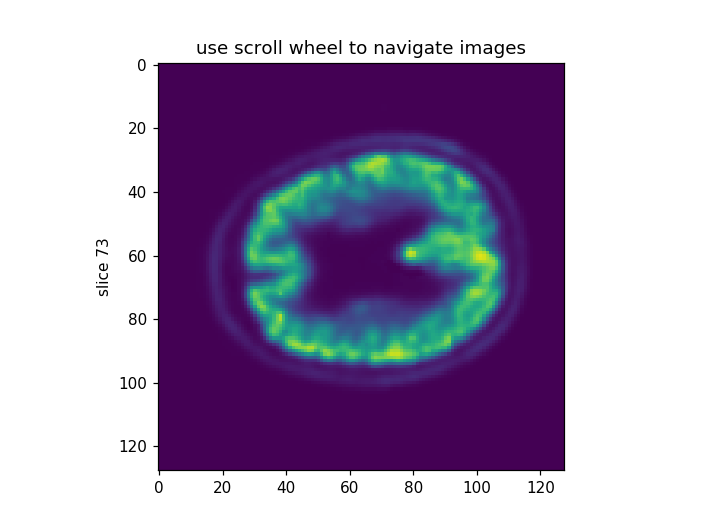

In [27]:
#Enables interactions
%matplotlib notebook

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt


class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

tracker = IndexTracker(ax, images[:,:,:,1])

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

# Translate the each slice in the ECAT-file and save as ECAT

# Try to vizualise the brain in 3D

TypeError: plot_surface() missing 1 required positional argument: 'self'

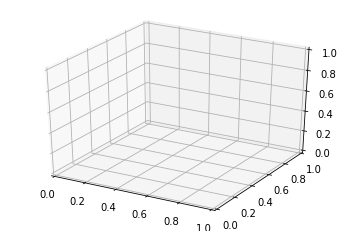

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Axes3D.plot_surface(X=images[:,:,1,1], Y=images[1,:,:,1], Z=images[:,1,:,1])